In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'D:\E\Learn_Materials\iris.csv')

In [3]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.describe().round(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [10]:
df['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

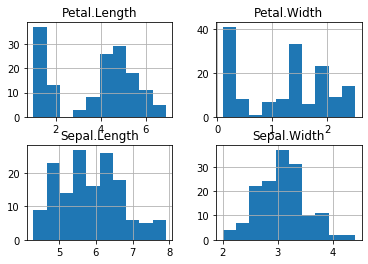

In [12]:
df.hist()
plt.show()

In [13]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [14]:
x = df[['Petal.Length', 'Petal.Width']]
y = df['Species']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)

In [16]:
len(x_train), len(x_test), len(y_train), len(y_test)

(105, 45, 105, 45)

In [18]:
y_train.value_counts()

virginica     35
setosa        35
versicolor    35
Name: Species, dtype: int64

In [19]:
y_test.value_counts()

setosa        15
virginica     15
versicolor    15
Name: Species, dtype: int64

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

stratify parameter does a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

if variable y is a variable with values 0 and 1 and there are 20% of zeros and 80% of ones, "stratify=y" will make the random split has 20% of 0's and 80% of 1's.

In [23]:
knn.predict_proba(x_test)[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

Of all classification algorithms implemented in scikit learn, there is an additional method 'predict_prob'. Instead of splitting the label, it outputs the probability for the target in array form. Let’s take a look at what the predicted probabilities are for the 11th and 12th flowers:

For example, the probability of the 11th flower being predicted an iris-setosa is 1, an iris-versicolor and an iris-virginica are both 0. For the next flower, there is a 20% chance that it would be classified as iris-versicolor but 80% chance to be iris-virginica

In [24]:
y_pred = knn.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



##### cross validation

In [28]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)

In [29]:
cv

array([1. , 1. , 1. , 1. , 1. , 1. , 0.8, 1. , 0.9, 0.9])

In [30]:
cv.mean()

0.96

##### gridsearchcv

In [32]:
from sklearn.model_selection import GridSearchCV
param = [{'n_neighbors':list(range(1,21))}]
gcv = GridSearchCV(estimator=knn, param_grid=param, scoring='accuracy')
gcv.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [33]:
gcv.best_score_

0.9714285714285715

In [34]:
gcv.best_params_

{'n_neighbors': 6}

#### probability prediction with new data

In [35]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])

In [36]:
knn.predict(new_data)

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [37]:
knn.predict_proba(new_data)

array([[0. , 1. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ]])

In [38]:
#row1 - 100% probability for versicolor
#row2 - 60% probability for virginica. predicted so
#row3 - 100% probability for setosa